In [26]:
import pandas as pd

file_path = 'C:\\Users\\YASWANTH\\Downloads\\Lab Session Data.xlsx'
sheet_name = 'Purchase data'
data = pd.read_excel(file_path, sheet_name=sheet_name)

A_columns = ['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']
C_column = 'Payment (Rs)'

# Segregate the data into matrices A and C
A = purchase_data[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
C = purchase_data['Payment (Rs)'].values.reshape(-1, 1)

# printing the matrix to understand
print(A)
print(C)

[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
[[386]
 [289]
 [393]
 [110]
 [280]
 [167]
 [271]
 [274]
 [148]
 [198]]


In [27]:
# finding the dimensionality of vector space
def dimensionality(A):
    dim = A.shape[1]
    return dim

dim = dimensionality(A)

print('Dimensionality of the vector space is :',dim)

Dimensionality of the vector space is : 3


In [28]:
# finding no of vectors in vector space
def no_of_vectors(A):
    count = A.shape[0]
    return count

no_vectors = no_of_vectors(A)

print('Number of vectors in the vector space is:', no_vectors)

Number of vectors in the vector space is: 10


In [29]:
# finding the rank of the matrix
import numpy as np

def rank_matrix(A):
    rank = np.linalg.matrix_rank(A)
    return rank

rank = rank_matrix(A)

print('Rank of matrix A is:', rank)

Rank of matrix A is: 3


In [36]:
# Function to calculate the cost of each product using pseudo-inverse
def calculate_costs(A, C):
    pseudo_inv_A = np.linalg.pinv(A)
    costs = np.dot(pseudo_inv_A, C)
    return costs

cost = calculate_costs(A,C)

print('Cost of each product is:', cost)

# Print the costs with product names
product_names = A_columns
cost_dict = {product_names[i]: cost[i][0] for i in range(len(product_names))}
print('Cost of each product:')
for product, cost in cost_dict.items():
    print(f'{product}: Rs {cost:.2f}')

Cost of each product is: [[ 1.]
 [55.]
 [18.]]
Cost of each product:
Candies (#): Rs 1.00
Mangoes (Kg): Rs 55.00
Milk Packets (#): Rs 18.00


In [34]:
def calculate_model_vector(A, C):
    pseudo_inv_A = np.linalg.pinv(A)
    X = np.dot(pseudo_inv_A, C)
    return X

X = calculate_model_vector(A, C)

print('Model vector X for predicting the cost of the products is:\n', X)

Model vector X for predicting the cost of the products is:
 [[ 1.]
 [55.]
 [18.]]


In [33]:
# Create a new column 'Class' based on the payment amount
data['Class'] = data['Payment (Rs)'].apply(lambda x: 'RICH' if x > 200 else 'POOR')

# Display the updated DataFrame
print("Data with Class:\n", data.head(10))

Data with Class:
   Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)  \
0      C_1           20             6                 2           386   
1      C_2           16             3                 6           289   
2      C_3           27             6                 2           393   
3      C_4           19             1                 2           110   
4      C_5           24             4                 2           280   
5      C_6           22             1                 5           167   
6      C_7           15             4                 2           271   
7      C_8           18             4                 2           274   
8      C_9           21             1                 4           148   
9     C_10           16             2                 4           198   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  \
0         NaN         NaN         NaN         NaN         NaN  ...   
1         NaN         NaN         NaN 

In [37]:
file_path = 'C:\\Users\\YASWANTH\\Downloads\\Lab Session Data.xlsx'
sheet_name = 'IRCTC Stock Price'
data = pd.read_excel(file_path, sheet_name=sheet_name)

In [46]:
price_column = data.iloc[:, 3]
import statistics

def calculate_price_statistics(price_column):
    mean_price = statistics.mean(price_column)
    variance_price = statistics.variance(price_column)
    return mean_price, variance_price

mean, variance = calculate_price_statistics(price_column)
print("Mean of the Price data:",mean)
print("Variance of the Price data:",variance)

Mean of the Price data: 1560.663453815261
Variance of the Price data: 58732.365352539186


In [52]:
price_column = data.iloc[:, 3]
# Filter data for Wednesdays
wednesdays = data[data['Day'] == 'Wed']
# Extract prices for Wednesdays
wednesday_prices = wednesdays.iloc[:, 3]
    
def comparing_sample(price_column, sample_prices):
    # Calculate population mean
    population_mean = statistics.mean(price_column)
    # Calculate sample mean for Wednesdays
    sample_mean = statistics.mean(sample_prices)
    return population_mean, sample_mean

population_mean, sample_mean_wednesdays = comparing_sample(price_column, wednesday_prices)

print("Population Mean of the Price data:",population_mean)
print("Sample Mean of the Price data for Wednesdays:",sample_mean_wednesdays)


Population Mean of the Price data: 1560.663453815261
Sample Mean of the Price data for Wednesdays: 1550.706


In [53]:
price_column = data.iloc[:, 3]
# Filter data for April
Apr = data[data['Month'] == 'Apr']
# Extract prices for April
Apr_prices = Apr.iloc[:, 3]

population_mean, sample_mean_apr = comparing_sample(price_column, Apr_prices)

print("Population Mean of the Price data:",population_mean)
print("Sample Mean of the Price data for April:",sample_mean_apr)

Population Mean of the Price data: 1560.663453815261
Sample Mean of the Price data for April: 1698.9526315789474


In [56]:
chg_column = data.iloc[:, 8]
def calculate_loss_probability(column):
    # Calculate the probability of making a loss
    # A loss is represented by a negative percentage change
    num_losses = (column < 0).sum()
    total_entries = len(column)
    # Calculate the probability    
    probability_of_loss = num_losses / total_entries
    return probability_of_loss

probability = calculate_loss_probability(chg_column)

print("Probability of making a loss over the stock: ",probability)

Probability of making a loss over the stock:  0.4979919678714859


In [58]:
# Filter data for Wednesday
Wed = data[data['Day'] == 'Wed']
# Extract chg% for April
Wed_chg = Wed.iloc[:, 8]

def calculate_profit_probability(column):
    # Calculate the probability of making a profit
    # A profit is represented by a positive percentage change
    num_profit = (column > 0).sum()
    total_entries = len(column)
    # Calculate the probability    
    probability_of_profit = num_profit / total_entries
    return probability_of_profit

probability = calculate_profit_probability(Wed_chg)

print("Probability of making a loss over the stock: ",probability)

Probability of making a loss over the stock:  0.42


In [60]:
chg_column = data.iloc[:, 8]
# Filter data for Wednesdays
wednesdays = data[data['Day'] == 'Wed']
# Extract chg% for Wednesdays
wednesday_chg = wednesdays.iloc[:, 8]

def calculate_conditional_profit_probability(column1, column2):
    sample = calculate_profit_probability(column1)
    total = calculate_profit_probability(column2)
    # Calculate the conditional probability
    conditional_probability = sample / total
    
    return conditional_probability

conditional_probability = calculate_conditional_profit_probability(wednesday_chg, chg_column)
print("Conditional Probability of making a profit given that today is Wednesday: ",conditional_probability)

Conditional Probability of making a profit given that today is Wednesday:  0.8433870967741935


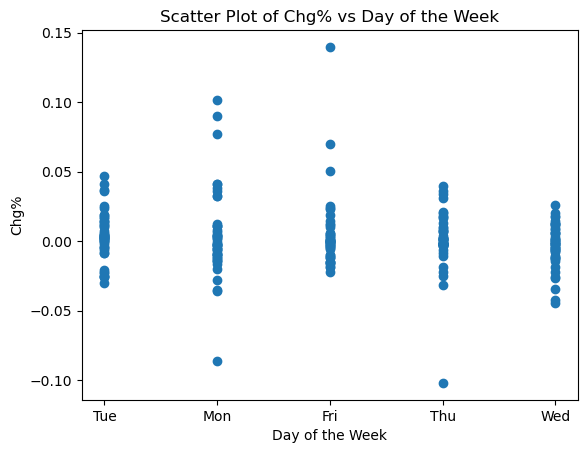

In [66]:
import matplotlib.pyplot as plt

day_column = data.iloc[:, 2]
chg_column = data.iloc[:, 8]
    
def scatter_plot(xaxis,yaxis): 
    # Plot the data
    plt.scatter(xaxis , yaxis)
    plt.xlabel('Day of the Week')
    plt.ylabel('Chg%')
    plt.title('Scatter Plot of Chg% vs Day of the Week')
    
scatter_plot(day_column, chg_column)


In [68]:
file_path = 'C:\\Users\\YASWANTH\\Downloads\\Lab Session Data.xlsx'
sheet_name = 'thyroid0387_UCI'
data = pd.read_excel(file_path, sheet_name=sheet_name)

In [69]:
def identify_attribute_data_types(file_path, sheet_name):
    # Display data types of each column
    print("\nData Types:\n", data.dtypes)
    # Identify and display the datatype (nominal, ordinal, interval, ratio) for each column
    # For simplicity, we'll use descriptive labels based on common understanding
    attribute_types = {}
    for column in data.columns:
        dtype = data[column].dtype
        if dtype == 'object':  # Typically for categorical data (nominal or ordinal)
            unique_values = data[column].unique()
            if len(unique_values) < 20:  # Small number of unique values, could be categorical
                attribute_types[column] = 'Nominal (Categorical)'
            else:
                attribute_types[column] = 'Textual Data'       
        elif dtype in ['int64', 'float64']:  # Numeric data
            if data[column].min() >= 0:  # All non-negative, could be ratio data
                attribute_types[column] = 'Ratio'
            else:
                attribute_types[column] = 'Interval'  # Generally used for continuous data
        else:
            attribute_types[column] = 'Unknown Data Type'
    print("\nAttribute Data Types:\n", attribute_types)

identify_attribute_data_types('C:\\Users\\YASWANTH\\Downloads\\Lab Session Data.xlsx', 'thyroid0387_UCI')



Data Types:
 Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured  

In [ ]:
5.2

In [71]:
# Identify numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
print("Numeric Columns:\n", numeric_columns)
    
# Calculate and display the range for each numeric column
for col in numeric_columns:
    min_value = data[col].min()
    max_value = data[col].max()
    print(f"Range for '{col}': Min = {min_value}, Max = {max_value}")

Numeric Columns:
 Index(['Record ID', 'age'], dtype='object')
Range for 'Record ID': Min = 840801013, Max = 870119035
Range for 'age': Min = 1, Max = 65526


In [72]:
# Check for missing values
missing_values = data.isnull().sum()
    
# Filter out attributes with no missing values
missing_values = missing_values[missing_values > 0]
    
if missing_values.empty:
    print("No missing values in the dataset.")
else:
    print("Missing Values:\n", missing_values)

No missing values in the dataset.


In [75]:
# Identify numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
print("Numeric Columns:\n", numeric_columns)
    
# Calculate and display outliers using IQR method
print("Outliers (IQR method):")
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
        
# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
        
# Find outliers
outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
print(f"Column '{col}':")
print("Outliers count:", outliers.shape[0])
print(outliers[[col]].head())

Numeric Columns:
 Index(['Record ID', 'age'], dtype='object')
Outliers (IQR method):
Column 'age':
Outliers count: 4
        age
2976    455
5710  65511
6392  65512
8105  65526


In [76]:
# Identify numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
print("Numeric Columns:\n", numeric_columns)

for col in numeric_columns:
    mean = data[col].mean()
    variance = data[col].var()
    std_dev = data[col].std()

    print(f"\nColumn '{col}':")
    print(f"Mean = {mean:.2f}")
    print(f"Variance = {variance:.2f}")
    print(f"Standard Deviation = {std_dev:.2f}")

Numeric Columns:
 Index(['Record ID', 'age'], dtype='object')

Column 'Record ID':
Mean = 852947346.61
Variance = 57486250586150.34
Standard Deviation = 7581968.78

Column 'age':
Mean = 73.56
Variance = 1401800.87
Standard Deviation = 1183.98
